[{'start_time': 1690201370925966, 'bar_label': 'Follow(1c8a283a400559e8)', 'duration': 8261, 'processIDs': 'p1'}, {'start_time': 1690201370911864, 'bar_label': '/api/user/follow(1e604c2b56bbaa92)', 'duration': 22483, 'processIDs': 'p1'}, {'start_time': 1690201370911000, 'bar_label': '/api/user/follow(21b0fead811eeff6)', 'duration': 23347, 'processIDs': 'p1'}, {'start_time': 1690201370930123, 'bar_label': 'social_graph_redis_update_client(23d221196221103d)', 'duration': 2267, 'processIDs': 'p2'}, {'start_time': 1690201370930003, 'bar_label': 'follow_server(1731ff24a1e6640c)', 'duration': 4008, 'processIDs': 'p2'}, {'start_time': 1690201370926828, 'bar_label': 'follow_with_username_server(53c8288e969f7d71)', 'duration': 7258, 'processIDs': 'p2'}, {'start_time': 1690201370930107, 'bar_label': 'mongo_update_client(f514bf2917b3eb4c)', 'duration': 3386, 'processIDs': 'p2'}, {'start_time': 1690201370930873, 'bar_label': 'social_graph_mongo_update_client(de94ba49b900351b)', 'duration': 3018, '

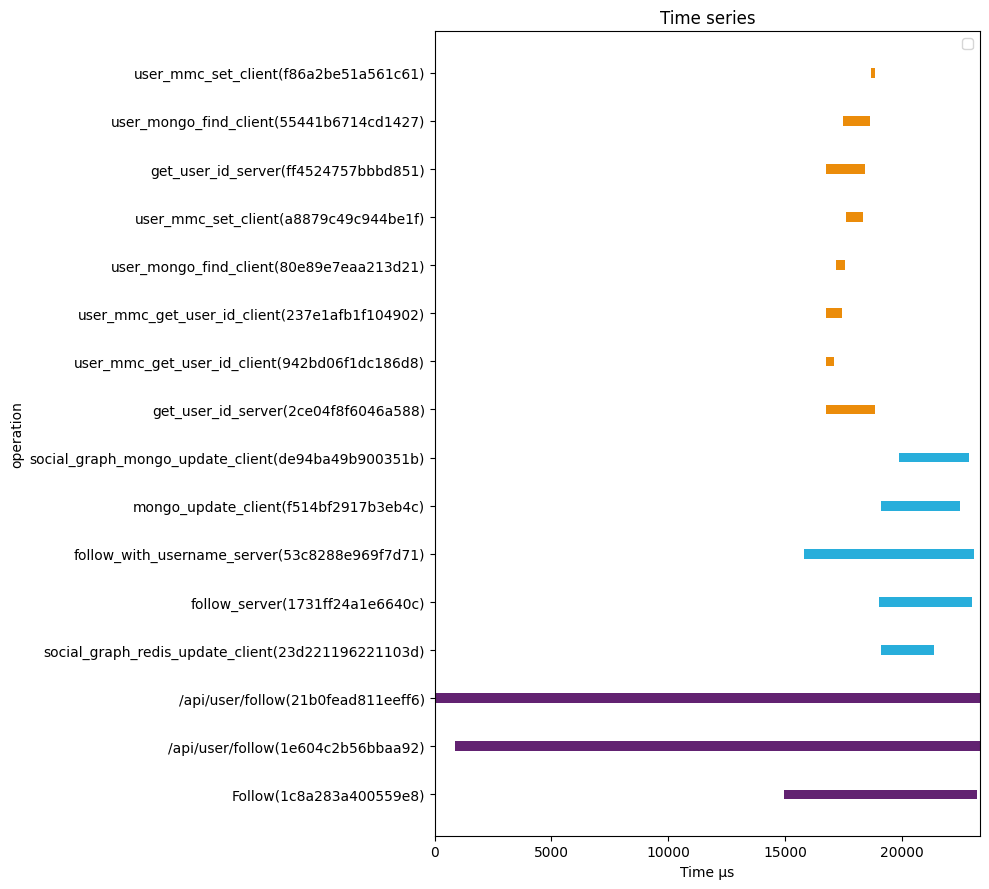

In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import random


f = open('/content/followUser.json')
name_input_file='follow2'
dataTrace = json.load(f)
mydata = dataTrace['data']
trace = mydata[0]
# Sample data (replace this with your actual data)
data =[]


for item in trace['spans']:
    row = {
            "start_time":item['startTime'],
            "bar_label":item['operationName']+'('+item['spanID']+')',
            "duration":item['duration'],
            "processIDs":item['processID']
    }
    data.append(row)

print(data)
print('number span is :',len(data))


min_start_time = data[0]['start_time']
for item in data:
        if item['start_time']<min_start_time:
                min_start_time = item['start_time']

print('start time ',min_start_time)

for item in data:
        new_start_time=(item['start_time']-min_start_time)
        item['start_time'] = new_start_time
        print(item['bar_label'], ' with time start',item['start_time'])

print(data)
# Create a custom chart
fig, ax = plt.subplots(figsize=(10,1+ (len(data)*0.5)))

process_ids = set(entry["processIDs"] for entry in data)
color_mapping = {process_id: f'#%06x' % random.randint(0, 0xFFFFFF) for process_id in process_ids}


# Set the end time of the chart (as the maximum end time of the data plus a buffer)
max_end_time = max(entry["start_time"] + entry["duration"] for entry in data)


# Plot the bars


number = 1
for entry in data:
    start_time = entry["start_time"]
    end_time = start_time + entry["duration"]
    bar_label = entry["bar_label"]
    process_id = entry["processIDs"]
    color = color_mapping[process_id]
    print(number,entry['bar_label'],end_time,start_time)
    number +=1
    ax.barh(bar_label, entry['duration'], left=start_time, height=0.2 ,color=color)



# Set the X-axis label
ax.set_xlabel("Time μs")

# Set the title and labels
ax.set_title("Time series")
ax.set_ylabel("operation")
ax.legend()

# Set the limits for the chart
ax.set_xlim(0,max_end_time+1)

# Show the chart
plt.tight_layout()
plt.savefig(f"time_series{name_input_file}.svg", format="svg", dpi=300)
plt.show()
